# Wrangle and Analyze Data - Project 3
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessing</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#analysis">Analysis</a></li>
</ul>

<a id='intro'></a>
We are going to walk through **the data wrangling process** (Gathering - Assesment - Cleaning) on *WeRateDogs twitter account*, and then figure out some insights and create some visualizations.

In [1265]:
# import needed libraries
import pandas as pd
import requests
import tweepy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>
# Gather

We will take the data from three sources:
1. `twitter-archive-enhanced.csv` file.
1. Image_predictions model file from web page.
1. Twitter API.

In [3]:
# import the csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# import data from web page
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# write the info. in a new file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [91]:
# import image_predictions.tsv file
Image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# Make twitter API object
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [44]:
# import needed Libraries
import json

# import info. through twitter API
# tweet id fails to find through twitter API
fails = []
with open('tweet_json.txt', mode='w') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print(tweet_id)
            retweet_count = tweet._json['retweet_count']
            favorite_count = tweet._json['favorite_count']
            
            tweet_data = {'tweet_id': tweet_id,
                          'retweet_count': int(retweet_count),
                          'favorite_count': int(favorite_count)
                         }
            json.dump(tweet_data, file)
            file.write('\n')
            
        except Exception as e:
            print(str(tweet_id) + ' '+ str(e))
            fails.append(tweet_id)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694

827199976799354881
826958653328592898
826848821049180160
826615380357632002
826598799820865537
826598365270007810
826476773533745153
826240494070030336
826204788643753985
826115272272650244
825876512159186944
825829644528148480
825535076884762624
825147591692263424
825120256414846976
825026590719483904
824796380199809024
824775126675836928
824663926340194305
824325613288833024
824297048279236611
824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150

772193107915964416
772152991789019136
772117678702071809
772114945936949249
772102971039580160
771908950375665664
771770456517009408
771500966810099713
771380798096281600
771171053431250945
771136648247640064
771102124360998913
771014301343748096
771004394259247104 [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
770787852854652928
770772759874076672
770743923962707968 [{'code': 144, 'message': 'No status found with that ID.'}]
770655142660169732
770414278348247044
770293558247038976
770093767776997377
770069151037685760
769940425801170949
769695466921623552
769335591808995329
769212283578875904
768970937022709760
768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
76607

Rate limit reached. Sleeping for: 332


758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368 [{'code': 144, 'message': 'No status found with that ID.'}]
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322246144
751937170840121344
751830394383790080
751793661361422336
751598357

705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515020802
700518061187723268
700505138482

678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642


Rate limit reached. Sleeping for: 372


676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206547968
675706639471788032
675534494439489536
675531475945709568
675522403582218240
675517828909424640
675501075957

668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997374976
667188689915760640
667182792070062081
667177989038297088
667176164155375616
667174963120574464
667171260800

In [46]:
# fails to find tweet id
fails

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [47]:
# List of dictionaries to build and convert to a DataFrame later
df_list = []
# Read from tweet_json.txt file to a DataFrame
with open('tweet_json.txt', mode='r') as file:
    for line in file:
        line = json.loads(line)
        tweet_id, retweet_count, favorite_count = line.values()
        
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})
        
tweet_data = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

<a id='assess'></a>
# Asses

### visual

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
Image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [59]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7651,35959
1,892177421306343426,5650,31042
2,891815181378084864,3748,23357
3,891689557279858688,7815,39263
4,891327558926688256,8411,37504
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,130,270
2328,666033412701032449,41,112
2329,666029285002620928,42,120


### Programmatic

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
# look randomly in the dataframe
twitter_archive.sample(3) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
1581,687124485711986689,NaN,NaN,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,None,None,None
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Everyone needs to watch this. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None


In [74]:
# the format of the source
twitter_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [68]:
# check for None values
twitter_archive[twitter_archive == 'None']

/Users/faisal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None
2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None


In [76]:
# Unusual dog names
twitter_archive[twitter_archive.name.apply(len) < 3]['name']

56       a
393     Mo
446     Bo
449     Bo
553     Bo
        ..
2349    an
2350     a
2352     a
2353     a
2354     a
Name: name, Length: 79, dtype: object

In [57]:
# Check for denominator ratings
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [58]:
# Check for numerator ratings
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [63]:
# check for duplicate rows
sum(twitter_archive.duplicated()), sum(Image_prediction.duplicated()), sum(tweet_data.duplicated())

(0, 0, 0)

In [277]:
# check for duplicate tweet_id
sum(twitter_archive.tweet_id.duplicated()), sum(Image_prediction.tweet_id.duplicated()), sum(tweet_data.tweet_id.duplicated())

(0, 0, 0)

In [77]:
# check for duplicate jpg_url 
sum(Image_prediction.jpg_url.duplicated())

66

In [81]:
# check for duplicate expanded_urls 
sum(twitter_archive.expanded_urls.duplicated())

137

In [12]:
Image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [67]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


### Quality 

#### `twitter_archive` table:

- Wrong data type of `timestamp` date.
- Unusual dog names like 'a' or 'O' (less than 3 characters).
- None values in the dog stages and their `name` instead of NaN.
- `source` column has html tag.
- dog stage and `source` columns should be categorical data type not string.
- We only want original ratings (no retweets) that have images.
- Unuseful columns `in_reply_to_status_id` & `in_reply_to_user_id` & `retweeted_status_id` & `retweeted_status_user_id` & `retweeted_status_timestamp` & `timestamp`.
- Duplicate `expanded_urls`.
- missing values in `expanded_urls`.
- Invalid ratings in column `rating_denominator`.
- Invalid ratings in column `rating_numerator`.

#### `Image_prediction` table:

- Duplicate `jpg_url`.

### Tidiness 

- `retweet_count` and `favorite_count` should be in `twitter_archive` table.
- Better to be `Image_prediction` table with `twitter_archive` table.
- `doggo` &`floofer` & `pupper` & `puppo` should be in one column (dog stage) in `twitter_archive` table.
- `timestamp` column should two separate column `date` and `time` in `twitter_archive` table.

<a id='clean'></a>
# Clean

In [1454]:
# Make a copy of each dataframe
twitter_archive_clean = twitter_archive.copy()
Image_prediction_clean = Image_prediction.copy()
tweet_data_clean = tweet_data.copy()

#### `tweet_data_clean` table : `retweet_count` and `favorite_count` should be in `twitter_archive_clean` table.

#### Define

Merge `tweet_data_clean` table with `twitter_archive_clean` table.

#### Code

In [1455]:
twitter_archive_clean = twitter_archive_clean.merge(tweet_data_clean, on='tweet_id')

#### Test

In [1456]:
list(twitter_archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count']

<a id='merge'></a>
#### `Image_prediction` table: Better to be with `twitter_archive` table.

#### Define

Merge `Image_prediction_clean` table with `twitter_archive_clean` table.

#### Code

In [1457]:
twitter_archive_clean = twitter_archive_clean.merge(Image_prediction_clean, on='tweet_id')

#### Test

In [1458]:
list(twitter_archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### `twitter_archive` table : `doggo` &`floofer` & `pupper` & `puppo` should be in one column (dog stage).

#### Define

Make one column called "stage" that include `doggo` & `floofer` & `pupper` & `puppo` in `twitter_archive` table.

#### Code

In [1459]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [column for column in list(twitter_archive_clean.columns) if column not in melt_columns]

# Melt the columns
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=stay_columns,
                                var_name='stage', value_name='dog_stage')

# Drop the stage column
twitter_archive_clean.drop(axis=1, columns=['stage'], inplace=True)

# Remove the duplicated rows, that stem from the Melting step
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.duplicated()]

In [1460]:
# Remove duplicated tweet id for None values after melting
duplicates = twitter_archive_clean[(twitter_archive_clean.tweet_id.duplicated(keep=False)) & (twitter_archive_clean.dog_stage == 'None')]
twitter_archive_clean.drop(duplicates.index, inplace=True)

# Remove duplicate tweet id
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.duplicated()]

#### Test

In [1461]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


#### `twitter_archive` table: `timestamp` column should two separate column `date` and `time`.

#### Define

Split the `date` and `time` in `timestamp`, then put them in separate columns. And make the `date` as a date datatype.

#### Code

In [1462]:
temp_df = twitter_archive_clean.timestamp.str.split(' ')

# take the date 
twitter_archive_clean['date'] = temp_df.apply(lambda x : x[0])
# take the time
twitter_archive_clean['time'] = temp_df.apply(lambda x : x[1])

# convert date column to date data type
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['date'])

#### Test

In [1463]:
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,date,time
1174,698989035503689728,NaN,NaN,2016-02-14 21:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He does toe touches in his sle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698989035...,...,True,Irish_terrier,0.243349,True,golden_retriever,0.085871,True,None,2016-02-14,21:55:47


In [1464]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 7053
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2059 non-null   int64         
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2059 non-null   object        
 4   source                      2059 non-null   object        
 5   text                        2059 non-null   object        
 6   retweeted_status_id         72 non-null     float64       
 7   retweeted_status_user_id    72 non-null     float64       
 8   retweeted_status_timestamp  72 non-null     object        
 9   expanded_urls               2059 non-null   object        
 10  rating_numerator            2059 non-null   int64         
 11  rating_denominator          2059 non-null   int64       

#### `Image_prediction` table: Duplicate `jpg_url`
#### We will *apply* the solution in the merged table `twitter_archive_clean` table.

#### Define

Remove Duplicate `jpg_url`

#### Code

In [1465]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.jpg_url.duplicated()]

#### Test

In [1466]:
sum(twitter_archive_clean.jpg_url.duplicated())

0

#### `twitter_archive` table: Unusual dog names like 'a' or 'O' (less than 3 characters)

#### Define

Remove rows with less than 3 characters name.

#### Code

In [1467]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name.apply(len) >=  3]

#### Test

In [1468]:
twitter_archive_clean[twitter_archive_clean.name.apply(len) <  3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,date,time


#### `twitter_archive` table: None values in the dog stages and their `name` instead of NaN.

#### Define

Change 'None' values to NaN.

#### Code

In [1469]:
name_index = twitter_archive_clean[twitter_archive_clean.name == 'None'].index
twitter_archive_clean.loc[name_index, 'name'] = np.nan

In [1470]:
dog_index = twitter_archive_clean[twitter_archive_clean.dog_stage == 'None'].index
twitter_archive_clean.loc[dog_index, 'dog_stage'] = np.nan

#### Test

In [1471]:
len(twitter_archive_clean[twitter_archive_clean.name == 'None'])

0

In [1472]:
len(twitter_archive_clean[twitter_archive_clean.dog_stage == 'None'])

0

#### `twitter_archive` table: `source` column has html tag.

#### Define

Remove the html tag.

#### Code

In [1473]:
import re

twitter_archive_clean['source'] = twitter_archive_clean.source.apply(lambda x: re.findall(r'>(.*?)<', x)[0])

The method above was inspired by **[this idea](https://chrisalbon.com/regex/patterns/match_text_between_html_tags/).**

#### Test

In [1474]:
twitter_archive_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
6937    Twitter for iPhone
6949    Twitter for iPhone
7011    Twitter for iPhone
7022    Twitter for iPhone
7053    Twitter for iPhone
Name: source, Length: 1925, dtype: object

#### `twitter_archive` table: `dog_stage` and `source` columns should be categorical data type not string.

#### Define

Change the data type of `dog_stage` and `source` columns to categorical data type.

#### Code

In [1475]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

#### Test

In [1476]:
twitter_archive_clean.dtypes[['dog_stage', 'source']]

dog_stage    category
source       category
dtype: object

#### `twitter_archive` table: We only want original ratings (no retweets) that have images.

#### Define

Take only the original rating (no retweets).

#### Code

In [1477]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [1478]:
len(twitter_archive_clean[~twitter_archive_clean.retweeted_status_id.isnull()])

0

#### `twitter_archive` table: Unuseful columns `in_reply_to_status_id` & `in_reply_to_user_id` & `retweeted_status_id` & 

#### `retweeted_status_user_id` & `retweeted_status_timestamp` & `timestamp`.

#### Define

Drop the Unuseful columns.

#### Code

In [1479]:
removed = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
           'retweeted_status_user_id', 'retweeted_status_timestamp', 'timestamp']
twitter_archive_clean.drop(columns=removed, axis=1, inplace=True)

#### Test

In [1480]:
twitter_archive_clean.columns.tolist()

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'date',
 'time']

#### `twitter_archive` table: Duplicate `expanded_urls`.

We have solved this issue implicitly when **<a href="#merge">we merge all the tables together</a>.**

And for more assurance we will test it here:

In [1481]:
sum(twitter_archive_clean.expanded_urls.duplicated())

0

#### `twitter_archive` table: missing values in `expanded_urls`.

We have solved this issue implicitly when **<a href="#merge">we merge all the tables together</a>.**

And for more assurance we will test it here:

In [1482]:
sum(twitter_archive_clean.expanded_urls.isnull())

0

#### `twitter_archive` table: Invalid ratings in column `rating_denominator`.

#### Define

We will make all `rating_denominator` as 10.

#### Code

In [1483]:
twitter_archive_clean['rating_denominator'] = 10

#### Test

In [1484]:
len(twitter_archive_clean[twitter_archive_clean.rating_denominator != 10])

0

#### `twitter_archive` table: Invalid ratings in column `rating_numerator`.

#### Define

We will leave only the values that are between 10 and 20.

#### Code

In [1485]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.rating_numerator <= 25) &
                                              (twitter_archive_clean.rating_numerator >= 4)]

#### Test

In [1486]:
twitter_archive_clean.rating_numerator.value_counts()

12    422
10    395
11    366
13    239
9     140
8      90
7      46
14     32
5      32
6      31
4      13
24      1
Name: rating_numerator, dtype: int64

In [1487]:
twitter_archive_clean.shape

(1807, 23)

In [1488]:
# Store the clean DataFrame in a CSV file
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
# Analysis

In [1489]:
df = pd.read_csv('twitter_archive_master.csv')

In [1490]:
df.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7651,35959,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5650,31042,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,2017-08-01,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3748,23357,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,2017-07-31,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7815,39263,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,2017-07-30,15:58:51
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8411,37504,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,2017-07-29,16:00:24


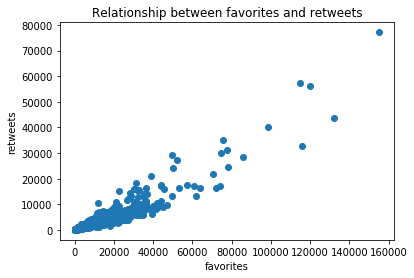

In [1491]:
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.title('Relationship between favorites and retweets')
plt.xlabel('favorites')
plt.ylabel('retweets');

- It seems from the figure above that there is a strong positive relationship between favorites and retweets of a tweet.

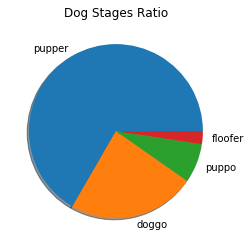

In [1492]:
plt.pie(df.dog_stage.value_counts(), labels=['pupper', 'doggo', 'puppo', 'floofer'], shadow=True)
plt.title('Dog Stages Ratio');

- It appears that pupper is the most popular stage of dogs, then doggo.

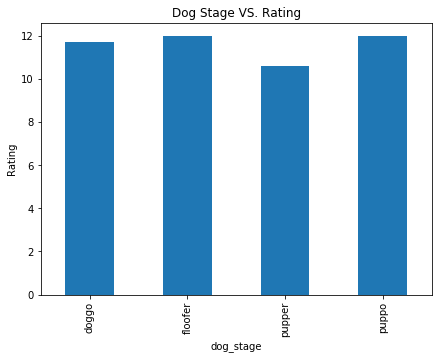

In [1493]:
stage_rating = df.groupby(['dog_stage']).mean()['rating_numerator']
stage_rating.plot(kind='bar', figsize=(7,5));
plt.title('Dog Stage VS. Rating')
plt.ylabel('Rating');

- We can figure out that floofer and puppo have the greatest ratings, while pupper has the least rating.

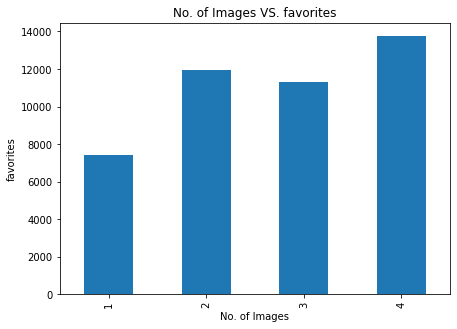

In [1494]:
favorite_img_num = df.groupby(['img_num']).mean()['favorite_count']
favorite_img_num.plot(kind='bar', figsize=(7,5));
plt.title('No. of Images VS. favorites')
plt.xlabel('No. of Images')
plt.ylabel('favorites');

- We can observe that it usually the favorites of a tweet go up whenever you upload more images.